# CDS DS219 Assignment5 # 

## Data Validation ## 

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
from sklearn import linear_model

In [5]:
# Importing the dataset_red
filename_red = 'winequality-red.csv'
data_red = pd.read_csv(filename_red, sep=';') 
print(data_red) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [6]:
# Importing the dataset_white
filename_white = 'winequality-white.csv'
data_white = pd.read_csv(filename_white, sep=';') 
print(data_white)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [7]:
# Let's find out how many rows in dataset have nulls
def check_null (data): 
    count = 0
    for i in range(data.shape[0]):
        rowisnull = False
        for j in range(data.shape[1]):
            rowisnull = rowisnull or pd.isnull(data.iloc[i][j])
        if rowisnull == True:
            count +=1
    return count
print(check_null(data_red), "rows in dataset_red have nulls") 
print(check_null(data_white), "rows in dataset_white have nulls")

0 rows in dataset_red have nulls
0 rows in dataset_white have nulls


In [8]:
# check if types are as expecteed
data_red.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
data_white.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Data Visualization ## 

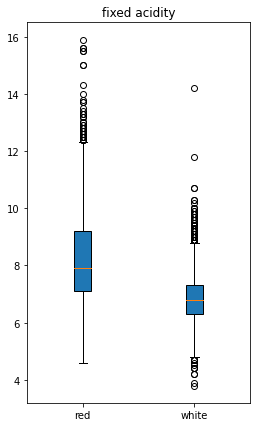

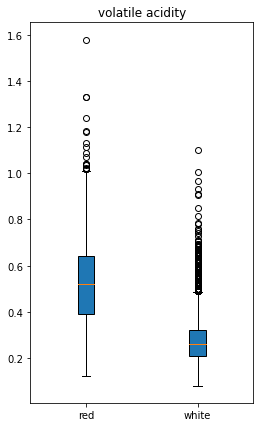

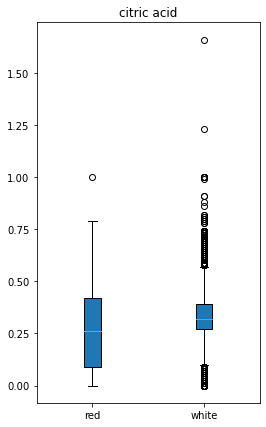

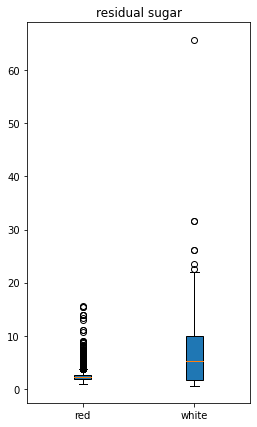

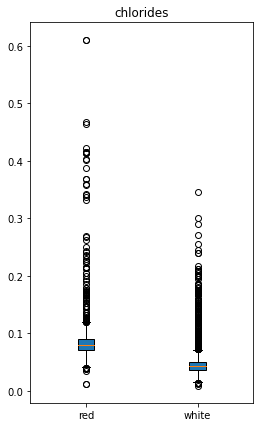

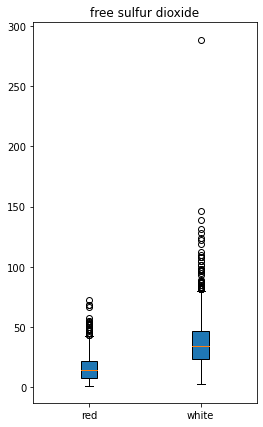

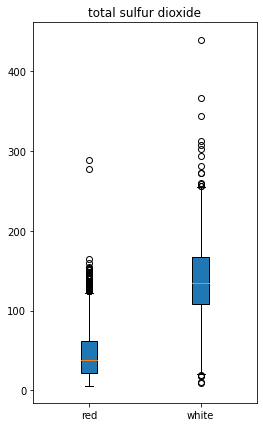

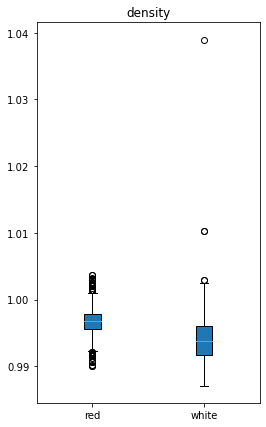

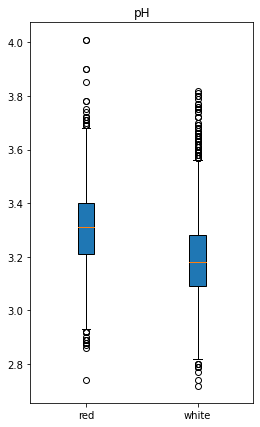

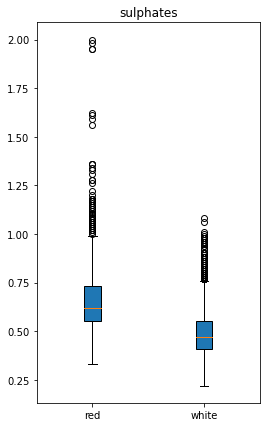

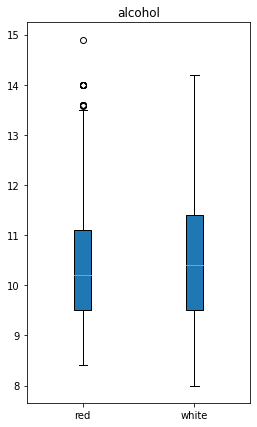

In [40]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
red = data_red[features]
white = data_white[features]

for f in features: 
    fig, ax = plt.subplots(figsize=(4, 7))

    # rectangular box plot
    bplot1 = ax.boxplot([red[f], white[f]],vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=['red', 'white'])  # will be used to label x-ticks
    ax.set_title(f)


## Hypothesis ## 

- Hypothesis 1: The `total sulfur dioxide` of red wine is always smaller than that of the white whine. 
- Hypothesis 2: The `chlorides` of red wine is always greater than that of the white whine. 

## Hypothesis Testing ## 

The tests for Hypothesis 1: 
  $$H_0: (\mu_1 - \mu_2) = 0$$
  $$H_a: (\mu_1 - \mu_2) \lt 0$$
where $\mu_1$ for red wine, $\mu_2$ for white wine. 

The tests for Hypothesis 2: 
  $$H_0: (\mu_1 - \mu_2) = 0$$
  $$H_a: (\mu_1 - \mu_2) \gt 0$$
where $\mu_1$ for red wine, $\mu_2$ for white wine. 

In [42]:
# featire selection 
feature = ['total sulfur dioxide', 'chlorides']
r = data_red[feature]
w = data_white[feature]

In [53]:
# calculate for the test statistics 
zc = []
n_red = r.shape[0]
n_white = w.shape[0]

for f in feature: 
    mean_red = np.mean(r[f])         
    mean_white = np.mean(w[f]) 
    variance_red = np.var(r[f]) 
    variance_white = np.var(r[f]) 
    print((mean_red - mean_white),(variance_red / n_red), (variance_white / n_white) )
    
    z = (mean_red - mean_white) / (((variance_red / n_red) + (variance_white / n_white)) ** 0.5) 
    zc.append(z)
zc 

-91.89286504095685 0.6763137183171702 0.22078922735589124
0.04169418552479307 1.3844636168301685e-06 4.5197168707869325e-07


[-97.01986161799074, 30.76717898274459]

In [54]:
za = 1.645 

# test whether or not the test statistic zc falls into the rejection region. 
print("For Hypothesis 1: ")
if zc[0] < -za : 
    print("There is sufficient evidence to reject the null hypothesis. ")
else: 
    print("There is no sufficient evidence to reject the null hypothesis. ")
    
print("For Hypothesis 2: ")
if zc[1] > za : 
    print("There is sufficient evidence to reject the null hypothesis. ")
else: 
    print("There is no sufficient evidence to reject the null hypothesis. ")
    

For Hypothesis 1: 
There is sufficient evidence to reject the null hypothesis. 
For Hypothesis 2: 
There is sufficient evidence to reject the null hypothesis. 


## Key Findings ## 

The result of the two tests justified our hypothesis, that the total sulfur dioxide of red wine is always smaller than that of the white whine, and the chlorides of red wine is always greater than that of the white whine.